# Capstone Project: The Battle of Neighborhoods

## An analysis of neighborhoods near Melbourne CBD using data science


# Table of Content <a name="toc"></a>

* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results & Discussion](#results)
* [Conclusion](#conclusion)
* [References](#references)

# 1. Introduction <a name="introduction"></a>

#### Go back to [Table of Contents](#toc)

### 1. 1 Background Information

Buying your first home is exciting as it marks the start of a brand-new chapter in life. However, it is equally stressful as there are numerous factors to consider. These factors include family needs, location and accessibility, facilities and amenities, type of the property, condition of the property, and price of the property. There are many property listing websites available today that consolidates and promotes listing information that many first-time homebuyers can utilise in their research. 

In this report, we will use data science methods to help narrow down neighbourhoods based on the needs of the homebuyer. The shortlisted neighbourhoods can then be used as input by the homebuyer when going through listing websites.


### 1. 2 Problem statement

In this report, we will help Sam to find suitable neighbourhoods in Melbourne (Victoria, Australia) based on his needs. Sam is 30 years old and has been working in Melbourne Central Business District (CBD) for the past 7 years. He is currently renting an apartment near his office with his fiancé. He and his fiancé are fitness freaks, they typically start their day with a morning workout together before work in a gym located near their apartment. After work, they would meet up in the local park for a short run before dinner. They typically cook at home on weekdays and eat out on the weekends with friends and family. Sam and his fiancé share an interest in Japanese cuisine and its always the choice of cuisine when they eat out. 

As Sam’s marriage ceremony is next year, he wishes to buy his first home and move in before the ceremony. He does not mind moving out of the city as he has a car to travel to and from work but does not wish to drive too long either. It would be a bonus if there’s a train station nearby his new home, so he and his fiancé have the option of using public transportation. Hence, he wants his next home to be within 25 kilometres (kms) from the CBD. His budget for his new home is 1,000,000 Australian Dollars (A$). 

There are more than 300 neighbourhoods in Melbourne, and it is daunting to for Sam to go through it and match it to his needs. Summarised, Sam would most likely enjoy neighbourhoods that are within 25 kms from the CBD and has the following venues nearby: 
1.	Gym
2.	Park
3.	Grocery store
4.	Japanese restaurant
5.	Train station

With this information in mind, we will be using data science methods to help Sam identify 5 neighbourhoods that are most suitable to his needs. 

### 1. 3 Target audience for this report

This report is customised to Sam’s needs as stated in the previous section. Nevertheless, the approach that we will be using can also be used and tweaked by other homebuyers in their property hunting research. Real estate agents may also be interested in this report as the approach we that will be using can assist them in providing customised data-driven suggestions to their clients. 

***

# 2. Data  <a name="data"></a>

#### Go back to [Table of Contents](#toc)

### 2.1 Description of Data

1. __Neighbourhood coordinates:__ this dataset is needed as the main reference of location points. This dataset is sourced from Corra [[1]](#references). Corra is a private company based in Adelaide, South Australia, and they provide high quality web design and development solutions to their clients. The dataset published by Corra is used as it contains the entire country’s latitude and longitude coordinates by postcode, suburb, and state. This dataset can be downloaded in CSV format. 


2. __Neighbourhood distance from CBD:__ this dataset will be used as reference to Sam’s new home requirements of within 25 kms from the CBD. This dataset is sourced from Myboot [[2]](#references). Myboot is a website that compiles information on Australian suburbs including demographics and crime statistics. We will be extracting their “Less than 25 km from Melbourne” list using web scraping methods as learned in Python Project for Data Science Course by IBM.

    
3. __Nearby venues:__ this dataset will be used to extract venues information within a specified range (i.e., 500 metres) from a specific location. This dataset will be sourced from Foursquare [[3]](#references). Foursquare is an app that provides personalized recommendations of places to go near a user's current location based on users' previous browsing history and check-in history. We will extract Foursquare venues data through accessing their Application Programming Interface (API) as learned in Applied Data Science Capstone Course by IBM.

	
4. __Median house price:__ this dataset will be sourced from the Victoria State Government [[4]](#references). The dataset will be useful reference to fulfil Sam’s budget requirements. This dataset can be downloaded in CSV format and it was recently updated on April 20, 2021. 


### 2.2 Python Libraries
For this report the following libraries are used: 


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from bs4 import BeautifulSoup # library to webscrape

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


### 2.3 Data preparation <a name="dataprep"></a>



#### (Dataset-A) Neighbourhood coordinates    [[1]](#references)

The dataset was downloaded in CSV format to my local disk from the source

In [2]:
# read the CSV file from my local disk
df_coor_raw = pd.read_csv('Australian_Post_Codes_Lat_Lon.csv')

In [3]:
print(df_coor_raw.shape)
df_coor_raw.head()

(16080, 7)


,postcode,suburb,state,dc,type,lat,lon
0,200,AUSTRALIAN NATIONAL UNIVERSITY,ACT,AUSTRALIAN NATIONAL UNI LPO,Post Office Boxes,-35.277272,149.117136
1,221,BARTON,ACT,NaN,LVR,-35.201372,149.095065
2,800,DARWIN,NT,DARWIN DELIVERY CENTRE,Delivery Area,-12.801028,130.955789
3,801,DARWIN,NT,DARWIN DELIVERY CENTRE,Post Office Boxes,-12.801028,130.955789
4,804,PARAP,NT,PARAP,Post Office Boxes,-12.432181,130.843310


df_coor_raw contains the postcodes in the entire country! A total of 16,080 rows across 7 columns.

Since we are only interested in Melbourne, we will be filtering the state of Victoria.

In [4]:
# Filtering to the state of Victoria only & remove unused columns
df_coor = df_coor_raw.loc[df_coor_raw['state']=='VIC'].drop(['state','dc', 'type'], axis = 1)

# Reset index to start from 0
df_coor.reset_index(drop=True, inplace=True)

# Convert column type to str for merging other datasets later
df_coor = df_coor.astype({'postcode': str})

In [5]:
df_coor.head()

,postcode,suburb,lat,lon
0,3000,MELBOURNE,-37.814563,144.970267
1,3001,MELBOURNE,-38.365017,144.765920
2,3002,EAST MELBOURNE,-37.816640,144.987811
3,3003,WEST MELBOURNE,-37.806255,144.941123
4,3004,MELBOURNE,-37.837324,144.976335


#### (Dataset-B) Median house price    [[4]](#references)

The dataset was downloaded in XLS format to my local disk from the source

In [6]:
df_median_raw = pd.read_excel('House_Medians3rdQtr2020.xls', header = 1)

df_median_raw.head()

,SUBURB,Jul - Sep 19,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,Jul - Sep 20,No of sales,No of Sales,Jul - Sep 19.1,Apr - Jun 20
0,NaN,NaN,NaN,NaN,NaN,NaN,Jul - Sep 20,YTD,Jul - Sep 20,Jul - Sep 20
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABBOTSFORD,1160000,1027500.0,1230000.0,1080000.0,1260000.0,8,33,8.6,16.7
3,ABERFELDIE,1352500,1650000.0,1732500.0,1375000.0,1600000.0,6,25,18.3,16.4
4,AINTREE,575000,620400.0,675000.0,685000.0,740000.0,8,52,28.7,8.0


We will only take the latest Median figures from "Jul-Sep 20" column and drop others

In [7]:
df_median = df_median_raw[['SUBURB', 'Jul - Sep 20']].dropna().reset_index(drop=True).rename(columns={"Jul - Sep 20": "Median_Price"})
df_median.head()

,SUBURB,Median_Price
0,ABBOTSFORD,1260000.0
1,ABERFELDIE,1600000.0
2,AINTREE,740000.0
3,AIREYS INLET,1300000.0
4,AIRPORT WEST,775000.0


#### (Dataset-C) Neighbourhood distance from CBD    [[2]](#references)

Unlike dataset A & B, this dataset does not have a ready-to-download format. 

Hence, we will scrape the data we need directly from the website.

In [8]:
# webscrape metadata
url = 'http://myboot.com.au/VIC/25/suburblist.aspx'
data  = requests.get(url).text 
soup = BeautifulSoup(data,"html5lib")

In [9]:
# View tag data 
soup.find_all('div', attrs={'class':'cssSUBURBDESC'})

[<div class="cssSUBURBDESC"><div class="cssTITLE"><a href="/3199/Frankston/suburb.aspx">Suburb : Frankston</a></div><img alt="Suburb : Frankston" src="/resources/Album/thumbnail/8c7c22de-8465-4313-93f4-b1d91e3df494.jpg"/><ul class="cssSUBURBHIGHLIGHT"><li>Distance from Melbourne CBD: 39km (24.4 miles)</li><li>Approximate size for this postcode: 35.6 km²</li><li>Surrounding suburbs: Langwarrin South(3911), Langwarrin(3910), Belvedere Park(3198), Pines Forest(3200), Frankston North(3200), Seaford(3198)</li><li>Total of population in this suburb in year 2011 : 35,009 people</li><li>Median age persons in 2011 was: 38 years old</li><li>Most of people in Frankston were born in Australia</li><li>Ancestors were mostly from: English</li><li>Median individual income in 2011 was: $517 per week</li><li>Median family income was: $1,187 per week</li><li>Median house price (2010): $305,000</li><li>Median unit price (2010): $229,000</li><li style="background-image:url()">             </li></ul></div>,

The first row is not relevant. Row 2 onwards is what we want.

In [10]:
table_contents=[] #empty list to hold looped data 
containers = soup.find_all('div', attrs={'class':'cssSUBURBDESC'})[1:] #row 0 is ignored as it is irrelevant. Other rows seem fine
for a in containers:
    cell = {}
    cell['PostalCode'] = a.get_text().split(':')[1].split('(')[1].split(')')[0]
    cell['Neighborhood'] = a.get_text().split(':')[1].split('(')[0]
    cell['km'] = a.get_text().split(':')[1].split('(')[1].split(')')[1].split('km')[0]
    table_contents.append(cell)

# converts into a dataframe
df_25km=pd.DataFrame(table_contents)

# to remove or strip the leading and trailing space
df_25km['Neighborhood'] = df_25km['Neighborhood'].str.strip()
df_25km['Neighborhood'] = df_25km['Neighborhood'].str.upper()

print(df_25km.shape)
df_25km.head()

(284, 3)


,PostalCode,Neighborhood,km
0,3067,ABBOTSFORD,2.5
1,3040,ABERFELDIE,9.1
2,3042,AIRPORT WEST,13.5
3,3021,ALBANVALE,19.2
4,3206,ALBERT PARK,3.3


#### (Dataset-D) Merged Dataset

Here we will merge all the datasets above (A to C) and call it __df_base__

In [11]:
df_base = pd.merge(df_25km, df_coor, left_on=['PostalCode','Neighborhood'], right_on=['postcode','suburb'])
df_base.drop(['postcode','suburb'],axis=1, inplace=True)

print(df_base.shape)
df_base.head()

(278, 5)


,PostalCode,Neighborhood,km,lat,lon
0,3067,ABBOTSFORD,2.5,-37.801781,144.998752
1,3040,ABERFELDIE,9.1,-37.756690,144.896259
2,3042,AIRPORT WEST,13.5,-37.711698,144.887037
3,3021,ALBANVALE,19.2,-37.745934,144.770027
4,3206,ALBERT PARK,3.3,-37.840705,144.955710


In [12]:
df_base['Median_Price'] = df_median['Median_Price']
print(df_base.shape)
df_base.head()

(278, 6)


,PostalCode,Neighborhood,km,lat,lon,Median_Price
0,3067,ABBOTSFORD,2.5,-37.801781,144.998752,1260000.0
1,3040,ABERFELDIE,9.1,-37.756690,144.896259,1600000.0
2,3042,AIRPORT WEST,13.5,-37.711698,144.887037,740000.0
3,3021,ALBANVALE,19.2,-37.745934,144.770027,1300000.0
4,3206,ALBERT PARK,3.3,-37.840705,144.955710,775000.0


#### (Dataset-E) Foursquare Nearby Venues Dataset

Here we will use Foursquare API to get all nearby venues from __df_base__ & call the it __df_venues__

In [13]:
CLIENT_ID = # Removed for sharing purposes 
CLIENT_SECRET = # Removed for sharing purposes 
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value|

In [14]:
# Function to repeat the same process to all the neighborhoods in our dataset
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
df_venues = getNearbyVenues(names=df_base['Neighborhood'],
                                   latitudes=df_base['lat'],
                                   longitudes=df_base['lon']
                                  )

ABBOTSFORD
ABERFELDIE
AIRPORT WEST
ALBANVALE
ALBERT PARK
ALBION
ALPHINGTON
ALTONA
ALTONA MEADOWS
ALTONA NORTH
ARDEER
ARMADALE
ASCOT VALE
ASHBURTON
ASHWOOD
ATTWOOD
AVONDALE HEIGHTS
BALACLAVA
BALWYN
BALWYN NORTH
BEAUMARIS
BELLFIELD
BENTLEIGH
BENTLEIGH EAST
BLACK ROCK
BLACKBURN
BLACKBURN NORTH
BLACKBURN SOUTH
BOX HILL
BOX HILL CENTRAL
BOX HILL NORTH
BOX HILL SOUTH
BRAESIDE
BRAYBROOK
BRAYBROOK NORTH
BRIAR HILL
BRIGHTON
BRIGHTON EAST
BRIGHTON NORTH
BROADMEADOWS
BROOKLYN
BRUNSWICK
BRUNSWICK EAST
BRUNSWICK WEST
BULLA
BULLEEN
BUNDOORA
BURNLEY
BURNLEY NORTH
BURNSIDE
BURNSIDE HEIGHTS
BURWOOD
BURWOOD EAST
CAIRNLEA
CALDER PARK
CAMBERWELL
CAMPBELLFIELD
CANTERBURY
CARLTON
CARLTON NORTH
CARNEGIE
CAROLINE SPRINGS
CAULFIELD
CAULFIELD EAST
CAULFIELD NORTH
CAULFIELD SOUTH
CHADSTONE
CHADSTONE CENTRE
CHELTENHAM
CLARINDA
CLAYTON
CLAYTON SOUTH
CLIFTON HILL
COBURG
COBURG NORTH
COLLINGWOOD
COOLAROO
CRAIGIEBURN
CREMORNE
DALLAS
DEER PARK
DELAHEY
DERRIMUT
DIAMOND CREEK
DINGLEY VILLAGE
DOCKLANDS
DONCASTER
DONCASTE

In [16]:
df_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ABBOTSFORD,-37.801781,144.998752,Lentil As Anything,-37.802724,145.003507,Vegetarian / Vegan Restaurant
1,ABBOTSFORD,-37.801781,144.998752,Abbotsford Convent,-37.802574,145.004410,Cultural Center
2,ABBOTSFORD,-37.801781,144.998752,Bodriggy Brewery Co.,-37.800093,144.994416,Brewery
3,ABBOTSFORD,-37.801781,144.998752,Abbotsford Convent Heritage Gardens,-37.802454,145.003510,Garden
4,ABBOTSFORD,-37.801781,144.998752,The Farm Cafe,-37.802940,145.005706,Café


#### (Dataset-F) Venues Matched to Sam's Requirements

Here we will filter & transform (Dataset-E) Foursquare Nearby Venues Dataset ( __df_venues__ ) based on Sam's requirements and call it __df_venues_sam__. Another dataset call __df_venues_final__ will also be creating using one-hot encoding & groupby from __df_venues_sam__ to get a nice summarized dataset

In [17]:
# Based on Sam's requirements
searchfor = ['Gym', 'Gym / Fitness Center',
             'Park',
             'Japanese Restaurant','Sushi Restaurant','Ramen Restaurant',
             'Train Station','Tram Station',
             'Grocery Store','Supermarket','Farmers Market','Market','Organic Grocery']

In [18]:
df_venues['found'] =  df_venues['Venue Category'].str.match('|'.join(searchfor))

In [19]:
print(df_venues.shape)   
    
df_venues.head()

(11059, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,found
0,ABBOTSFORD,-37.801781,144.998752,Lentil As Anything,-37.802724,145.003507,Vegetarian / Vegan Restaurant,False
1,ABBOTSFORD,-37.801781,144.998752,Abbotsford Convent,-37.802574,145.004410,Cultural Center,False
2,ABBOTSFORD,-37.801781,144.998752,Bodriggy Brewery Co.,-37.800093,144.994416,Brewery,False
3,ABBOTSFORD,-37.801781,144.998752,Abbotsford Convent Heritage Gardens,-37.802454,145.003510,Garden,False
4,ABBOTSFORD,-37.801781,144.998752,The Farm Cafe,-37.802940,145.005706,Café,False


In [20]:
df_venues_sam = df_venues.loc[df_venues['found']==True]

print(df_venues_sam.shape)   
    
df_venues_sam.head()

(1713, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,found
15,ABBOTSFORD,-37.801781,144.998752,Slow Food Market,-37.802481,145.003597,Farmers Market,True
30,ABBOTSFORD,-37.801781,144.998752,Minh Phat Supermarket,-37.809652,144.996163,Grocery Store,True
40,ABBOTSFORD,-37.801781,144.998752,Aka Siro,-37.805199,144.985524,Japanese Restaurant,True
44,ABBOTSFORD,-37.801781,144.998752,CrossFit Collingwood,-37.806140,144.989968,Gym,True
64,ABBOTSFORD,-37.801781,144.998752,Hinoki Japanese Pantry,-37.800580,144.983955,Sushi Restaurant,True


In [21]:
df_venues_sam['Venue Category'].unique()

array(['Farmers Market', 'Grocery Store', 'Japanese Restaurant', 'Gym',
       'Sushi Restaurant', 'Park', 'Supermarket', 'Gym / Fitness Center',
       'Train Station', 'Ramen Restaurant', 'Tram Station', 'Market',
       'Gym Pool'], dtype=object)

Let's grouped the venue category into just 5 groups

In [22]:
# Standardize venue categories 
rename = {'Gym / Fitness Center': 'Gym',
          'Sushi Restaurant' : 'Japanese Restaurant',
          'Ramen Restaurant' : 'Japanese Restaurant',
          'Train Station' : 'Train/Tram Station',
          'Tram Station' : 'Train/Tram Station',
          'Organic Grocery':'Grocery Store',
          'Supermarket':'Grocery Store',
          'Farmers Market':'Grocery Store',
          'Market':'Grocery Store'
         }

df_venues_sam['Venue Category New'] = df_venues_sam["Venue Category"].replace(rename)

<ipython-input-22-afaba6a6dc45>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_venues_sam['Venue Category New'] = df_venues_sam["Venue Category"].replace(rename)


In [23]:
print(df_venues_sam.shape)   
    
df_venues_sam.head()

(1713, 9)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,found,Venue Category New
15,ABBOTSFORD,-37.801781,144.998752,Slow Food Market,-37.802481,145.003597,Farmers Market,True,Grocery Store
30,ABBOTSFORD,-37.801781,144.998752,Minh Phat Supermarket,-37.809652,144.996163,Grocery Store,True,Grocery Store
40,ABBOTSFORD,-37.801781,144.998752,Aka Siro,-37.805199,144.985524,Japanese Restaurant,True,Japanese Restaurant
44,ABBOTSFORD,-37.801781,144.998752,CrossFit Collingwood,-37.806140,144.989968,Gym,True,Gym
64,ABBOTSFORD,-37.801781,144.998752,Hinoki Japanese Pantry,-37.800580,144.983955,Sushi Restaurant,True,Japanese Restaurant


In [24]:
# Remove unused columns
df_venues_sam2 = pd.DataFrame(df_venues_sam[['Neighborhood','Venue Category New']])
print(df_venues_sam2.shape) 
df_venues_sam2.head()

(1713, 2)


,Neighborhood,Venue Category New
15,ABBOTSFORD,Grocery Store
30,ABBOTSFORD,Grocery Store
40,ABBOTSFORD,Japanese Restaurant
44,ABBOTSFORD,Gym
64,ABBOTSFORD,Japanese Restaurant


We will now use __one hot encoding__ to transform the respective venue categories to columns, so we can analyse easily in the next section.

In [25]:
# one hot encoding
df_venues_sam2_onehot = pd.get_dummies(df_venues_sam2[['Venue Category New']],prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_venues_sam2_onehot['Neighborhood'] = df_venues_sam2['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [df_venues_sam2_onehot.columns[-1]] + list(df_venues_sam2_onehot.columns[:-1])
df_venues_sam2_onehot = df_venues_sam2_onehot[fixed_columns]
df_venues_sam2_onehot.head()

,Neighborhood,Grocery Store,Gym,Gym Pool,Japanese Restaurant,Park,Train/Tram Station
15,ABBOTSFORD,1,0,0,0,0,0
30,ABBOTSFORD,1,0,0,0,0,0
40,ABBOTSFORD,0,0,0,1,0,0
44,ABBOTSFORD,0,1,0,0,0,0
64,ABBOTSFORD,0,0,0,1,0,0


We will now use __groupby__ to group all the rows by neighborhood

In [26]:
venues_list = ['Grocery Store','Gym', 'Japanese Restaurant', 'Park', 'Train/Tram Station']

df_venues_sam2_onehot_grouped = pd.DataFrame(df_venues_sam2_onehot.groupby(['Neighborhood'])[venues_list].sum())
df_venues_sam2_onehot_grouped.reset_index(inplace=True)

print(df_venues_sam2_onehot_grouped.shape) 
df_venues_sam2_onehot_grouped.head()

(264, 6)


,Neighborhood,Grocery Store,Gym,Japanese Restaurant,Park,Train/Tram Station
0,ABBOTSFORD,5,1,4,1,0
1,ABERFELDIE,1,0,0,4,0
2,AIRPORT WEST,3,4,0,0,0
3,ALBANVALE,3,0,0,0,0
4,ALBERT PARK,2,0,2,1,0


Next, we will further filter the grouped table above to remove rows that have 0 nearby venues as per Sam's requirements

In [27]:
contains_zero = (df_venues_sam2_onehot_grouped == 0).any(axis=1)
df_venues_final = df_venues_sam2_onehot_grouped.loc[contains_zero==False]

print(df_venues_final.shape) 
df_venues_final.head()

(40, 6)


,Neighborhood,Grocery Store,Gym,Japanese Restaurant,Park,Train/Tram Station
6,ALPHINGTON,2,1,2,3,3
11,ARMADALE,4,1,4,2,6
12,ASCOT VALE,7,5,2,1,2
25,BLACKBURN NORTH,3,1,2,2,1
27,BOX HILL,3,2,1,1,3


#### (Dataset-G) Final Dataset

Here we will merge (Dataset-F) Venues Matched to Sam's Requirements ( __df_venues_final__ ) with (Dataset-D) Merged Dataset ( __df_base__ ) to get the coordinates & median price & KMs from CBD. The merged dataset will be called __df__

In [28]:
df = pd.merge(df_venues_final, df_base, left_on=['Neighborhood'], right_on=['Neighborhood'])

# Convert column type 
df = df.astype({'km': float,
                'Grocery Store': float ,
                'Gym': float ,
                'Japanese Restaurant': float ,
                'Park': float ,
                'Train/Tram Station': float ,})

print(df.shape)
df.head()

(40, 11)


,Neighborhood,Grocery Store,Gym,Japanese Restaurant,Park,Train/Tram Station,PostalCode,km,lat,lon,Median_Price
0,ALPHINGTON,2.0,1.0,2.0,3.0,3.0,3078,6.4,-37.780767,145.031160,1738800.0
1,ARMADALE,4.0,1.0,4.0,2.0,6.0,3143,6.3,-37.859340,145.018505,820000.0
2,ASCOT VALE,7.0,5.0,2.0,1.0,2.0,3032,5.9,-37.775830,144.923377,805000.0
3,BLACKBURN NORTH,3.0,1.0,2.0,2.0,1.0,3130,15.9,-37.810403,145.152100,1002500.0
4,BOX HILL,3.0,2.0,1.0,1.0,3.0,3128,13.1,-37.817455,145.119314,550000.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Neighborhood         40 non-null     object 
 1   Grocery Store        40 non-null     float64
 2   Gym                  40 non-null     float64
 3   Japanese Restaurant  40 non-null     float64
 4   Park                 40 non-null     float64
 5   Train/Tram Station   40 non-null     float64
 6   PostalCode           40 non-null     object 
 7   km                   40 non-null     float64
 8   lat                  40 non-null     float64
 9   lon                  40 non-null     float64
 10  Median_Price         40 non-null     float64
dtypes: float64(9), object(2)
memory usage: 3.8+ KB


#### (Dataset-H) Venues Matched to Sam's Requirements Final 

Here we will filter & transform (Dataset-F) Venues Matched to Sam's Requirements Final  (__df_venues_sam__) to remove venues that are not within the shortlised neighborhoods as per (Dataset-G) Final Dataset ( __df__ )

In [30]:
print(df_venues_sam.shape)
df_venues_sam.head()

(1713, 9)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,found,Venue Category New
15,ABBOTSFORD,-37.801781,144.998752,Slow Food Market,-37.802481,145.003597,Farmers Market,True,Grocery Store
30,ABBOTSFORD,-37.801781,144.998752,Minh Phat Supermarket,-37.809652,144.996163,Grocery Store,True,Grocery Store
40,ABBOTSFORD,-37.801781,144.998752,Aka Siro,-37.805199,144.985524,Japanese Restaurant,True,Japanese Restaurant
44,ABBOTSFORD,-37.801781,144.998752,CrossFit Collingwood,-37.806140,144.989968,Gym,True,Gym
64,ABBOTSFORD,-37.801781,144.998752,Hinoki Japanese Pantry,-37.800580,144.983955,Sushi Restaurant,True,Japanese Restaurant


In [31]:
df_venues_sam_final = pd.merge(df, df_venues_sam, left_on=['Neighborhood'], right_on=['Neighborhood'])


print(df_venues_sam_final.shape)
df_venues_sam_final.head()

(465, 19)


,Neighborhood,Grocery Store,Gym,Japanese Restaurant,Park,Train/Tram Station,PostalCode,km,lat,lon,Median_Price,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,found,Venue Category New
0,ALPHINGTON,2.0,1.0,2.0,3.0,3.0,3078,6.4,-37.780767,145.03116,1738800.0,-37.780767,145.03116,Darebin Parklands,-37.775152,145.034774,Park,True,Park
1,ALPHINGTON,2.0,1.0,2.0,3.0,3.0,3078,6.4,-37.780767,145.03116,1738800.0,-37.780767,145.03116,Anytime Fitness,-37.780629,145.031424,Gym / Fitness Center,True,Gym
2,ALPHINGTON,2.0,1.0,2.0,3.0,3.0,3078,6.4,-37.780767,145.03116,1738800.0,-37.780767,145.03116,Matsuya Japanese Restaurant,-37.776170,145.018621,Japanese Restaurant,True,Japanese Restaurant
3,ALPHINGTON,2.0,1.0,2.0,3.0,3.0,3078,6.4,-37.780767,145.03116,1738800.0,-37.780767,145.03116,Fairfield IGA,-37.777943,145.018251,Grocery Store,True,Grocery Store
4,ALPHINGTON,2.0,1.0,2.0,3.0,3.0,3078,6.4,-37.780767,145.03116,1738800.0,-37.780767,145.03116,Alphington Station,-37.778398,145.031113,Train Station,True,Train/Tram Station


In [32]:
df_venues_sam_final['Venue Category New'].unique()

array(['Park', 'Gym', 'Japanese Restaurant', 'Grocery Store',
       'Train/Tram Station'], dtype=object)

In [33]:
df_venues_sam_final = df_venues_sam_final.loc[df_venues_sam_final['Venue Category New']!='Gym Pool']

print(df_venues_sam_final.shape)
df_venues_sam_final.head()

(465, 19)


,Neighborhood,Grocery Store,Gym,Japanese Restaurant,Park,Train/Tram Station,PostalCode,km,lat,lon,Median_Price,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,found,Venue Category New
0,ALPHINGTON,2.0,1.0,2.0,3.0,3.0,3078,6.4,-37.780767,145.03116,1738800.0,-37.780767,145.03116,Darebin Parklands,-37.775152,145.034774,Park,True,Park
1,ALPHINGTON,2.0,1.0,2.0,3.0,3.0,3078,6.4,-37.780767,145.03116,1738800.0,-37.780767,145.03116,Anytime Fitness,-37.780629,145.031424,Gym / Fitness Center,True,Gym
2,ALPHINGTON,2.0,1.0,2.0,3.0,3.0,3078,6.4,-37.780767,145.03116,1738800.0,-37.780767,145.03116,Matsuya Japanese Restaurant,-37.776170,145.018621,Japanese Restaurant,True,Japanese Restaurant
3,ALPHINGTON,2.0,1.0,2.0,3.0,3.0,3078,6.4,-37.780767,145.03116,1738800.0,-37.780767,145.03116,Fairfield IGA,-37.777943,145.018251,Grocery Store,True,Grocery Store
4,ALPHINGTON,2.0,1.0,2.0,3.0,3.0,3078,6.4,-37.780767,145.03116,1738800.0,-37.780767,145.03116,Alphington Station,-37.778398,145.031113,Train Station,True,Train/Tram Station


***

# 3. Methodology <a name="methodology"></a>

#### Go back to [Table of Contents](#toc)

In this section, we will perform data analysis using Dataset-G Final Dataset ( __df__ ) & Dataset-H Venues Matched to Sam's Requirements ( __df_venues_sam_final__ ). 

The outputs include:
1. Median Price Group Distribution
2. Map showing shortlisted Neighborhoods
3. Map showing shortlisted Neighborhoods + nearby venues
4. Cluster Analysis 


### 3. 1 Median Price Group Distribution

Here's a recap of the Final Dataset __df__ that is shortlisted as per Sam's needs

In [34]:
print(df.shape)
df.head()

(40, 11)


,Neighborhood,Grocery Store,Gym,Japanese Restaurant,Park,Train/Tram Station,PostalCode,km,lat,lon,Median_Price
0,ALPHINGTON,2.0,1.0,2.0,3.0,3.0,3078,6.4,-37.780767,145.031160,1738800.0
1,ARMADALE,4.0,1.0,4.0,2.0,6.0,3143,6.3,-37.859340,145.018505,820000.0
2,ASCOT VALE,7.0,5.0,2.0,1.0,2.0,3032,5.9,-37.775830,144.923377,805000.0
3,BLACKBURN NORTH,3.0,1.0,2.0,2.0,1.0,3130,15.9,-37.810403,145.152100,1002500.0
4,BOX HILL,3.0,2.0,1.0,1.0,3.0,3128,13.1,-37.817455,145.119314,550000.0


We will create two additional columns (1) Median Price Grouped & (2) Median Price Grouped Color

In [35]:
bins = [0, 400000, 600000, 800000, 1000000, 1500000, 2000000, 5000000]
labels = [1, # <400k
          2, # 400 to 600k
          3, # 600 to 800k
          4, # 800k to 1M
          5, # 1 to 1.5M
          6, # 1.5 to 2M
          7] # 2 to 5M

labels_colours = ['darkgreen', # <400k
                  'mediumseagreen', # 400 to 600k
                  'springgreen', # 600 to 800k
                  'gold', # 800k to 1M
                  'coral', # 1 to 1.5M
                  'red', # 1.5 to 2M
                  'maroon'] # 2 to 5M

df['Median_Price_Group'] = pd.cut(df['Median_Price'] , bins=bins, labels=labels).astype(int)
df['Median_Price_Group_Colours'] = pd.cut(df['Median_Price'] , bins=bins, labels=labels_colours)

Let's visualise the distribution of Median Price Group using a histogram

Text(0.5, 1.0, 'Median Price Distribution by Groups')

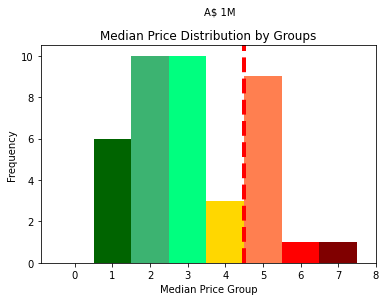

In [36]:
values = df['Median_Price_Group']
bins = np.arange(9)

n, bins, patches = plt.hist(values, bins=bins, align='left', color='g')
patches[1].set_fc('darkgreen')
patches[2].set_fc('mediumseagreen')
patches[3].set_fc('springgreen')
patches[4].set_fc('gold')
patches[5].set_fc('coral')
patches[6].set_fc('red')
patches[7].set_fc('maroon')

plt.xticks(bins)

plt.axvline(4.5, 0,1, linewidth = 4, linestyle ="--", color='red')
plt.text(4.51,12,'A$ 1M   ',horizontalalignment='right',rotation=0)

plt.ylabel('Frequency')
plt.xlabel('Median Price Group')
plt.title('Median Price Distribution by Groups')

### 3. 2 Map showing shortlisted Neighborhoods

In [37]:
address = 'Melbourne, VIC'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
lat_CBD = location.latitude
lon_CBD = location.longitude
print('The geograpical coordinate of Melbourne, VIC are {}, {}.'.format(lat_CBD, lon_CBD))

The geograpical coordinate of Melbourne, VIC are -37.8142176, 144.9631608.


In [38]:
# create map
melbPrice_map = folium.Map(location=[lat_CBD, lon_CBD], tiles='CartoDB positron' , zoom_start=11)

# add markers to map
for lat, lng, neigh, km, price,  color in zip(df['lat'], df['lon'], df['Neighborhood'], df['km'],df['Median_Price'], df['Median_Price_Group_Colours']):
    label = '{}, {}km, {}'.format(neigh, km, price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.75,
        parse_html=False).add_to(melbPrice_map)

#add an icon at  Melbourne CBD
text = 'Melbourne CBD'

iframe = folium.IFrame(text, width=200, height=25)
popup = folium.Popup(iframe, max_width=3000)

melbPrice_map.add_child(folium.Marker(location=[lat_CBD, lon_CBD], popup=popup,
                     icon=folium.Icon(color='red')))
melbPrice_map

### 3. 3 Map showing shortlisted Neighborhoods + nearby veneus

In [39]:
# create map
melbPrice_map = folium.Map(location=[lat_CBD, lon_CBD], tiles='CartoDB positron' , zoom_start=11)

# add markers to map
for lat, lng, neigh, km, price,  color in zip(df['lat'], df['lon'], df['Neighborhood'], df['km'],df['Median_Price'], df['Median_Price_Group_Colours']):
    label = '{}, {}km, {}'.format(neigh, km, price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.75,
        parse_html=False).add_to(melbPrice_map)

for lat, lng, cat, venue in zip(df_venues_sam_final['Venue Latitude'], df_venues_sam_final['Venue Longitude'], df_venues_sam_final['Venue Category New'], df_venues_sam_final['Venue']):
    label = '{} ({})'.format(venue, cat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='grey',
        fill=True,
        fill_color='grey',
        fill_opacity=0.15,
        parse_html=False).add_to(melbPrice_map)
    
#add an icon at  Melbourne CBD
text = 'Melbourne CBD'

iframe = folium.IFrame(text, width=200, height=25)
popup = folium.Popup(iframe, max_width=3000)

melbPrice_map.add_child(folium.Marker(location=[lat_CBD, lon_CBD], popup=popup,
                     icon=folium.Icon(color='red')))
melbPrice_map

### 3. 4 Cluster Analysis using K-Means Clustering

The aim of K-Means clustering technique is to segregate groups with similar traits and assign them into clusters.

We will create a new dataframe called df_clustering that removes all unneeded columns

In [40]:
df_clustering = df.drop(['Neighborhood','PostalCode','Median_Price_Group_Colours','Median_Price','Median_Price_Group','lat','lon'], 1)
df_clustering.head()

,Grocery Store,Gym,Japanese Restaurant,Park,Train/Tram Station,km
0,2.0,1.0,2.0,3.0,3.0,6.4
1,4.0,1.0,4.0,2.0,6.0,6.3
2,7.0,5.0,2.0,1.0,2.0,5.9
3,3.0,1.0,2.0,2.0,1.0,15.9
4,3.0,2.0,1.0,1.0,3.0,13.1


As K-Means clustering technique requires the user to specify the number of clusters before it runs the algorithm, we can use the Elbow Method to find the optimal value of k in K-means

In [41]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
X = df_clustering

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_



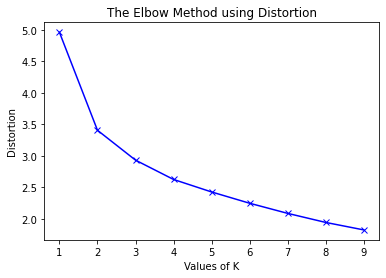

In [42]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


In [43]:
# set number of clusters based on optimum value in the graph above
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 1, 2, 2, 2, 2, 2, 1])

In [44]:
# add clustering labels
#df.insert(0, 'Cluster Labels', kmeans.labels_)
df['Cluster Labels'] = kmeans.labels_

***

# 4. Results & Discussion <a name="results"></a>

#### Go back to [Table of Contents](#toc)

Text(0.5, 1.0, 'Median Price Distribution by Groups')

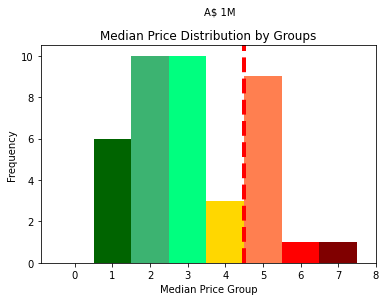

In [45]:
values = df['Median_Price_Group']
bins = np.arange(9)

n, bins, patches = plt.hist(values, bins=bins, align='left', color='g')
patches[1].set_fc('darkgreen')
patches[2].set_fc('mediumseagreen')
patches[3].set_fc('springgreen')
patches[4].set_fc('gold')
patches[5].set_fc('coral')
patches[6].set_fc('red')
patches[7].set_fc('maroon')

plt.xticks(bins)

plt.axvline(4.5, 0,1, linewidth = 4, linestyle ="--", color='red')
plt.text(4.51,12,'A$ 1M   ',horizontalalignment='right',rotation=0)

plt.ylabel('Frequency')
plt.xlabel('Median Price Group')
plt.title('Median Price Distribution by Groups')

In [46]:
df[['Median_Price_Group','Neighborhood']].groupby('Median_Price_Group').count()

,Neighborhood
Median_Price_Group,
1,6
2,10
3,10
4,3
5,9
6,1
7,1


1 = <400k

2 = 400 to 600k

3 = 600 to 800k

4 = 800k to 1M

5 = 1 to 1.5M

6 = 1.5 to 2M

7 = 2 to 5M

### Observations ⬆️ 

#### Based on the above distribution as created in __3.1__, majority of the neighborhoods shortlisted are within Sam's budget. 

#### There are 2 neighbourhoods that might be too expensive for Sam, that is neighborhoods in Group 6 & 7. Nevertheless, we will not remove these datapoints as they are median prices only, and there might be properties priced around Sam's budget, when continues his research on the listing websites.

***

In [47]:
df[['Cluster Labels','Neighborhood']].groupby('Cluster Labels').count()

,Neighborhood
Cluster Labels,
0,22
1,6
2,12


<AxesSubplot:xlabel='Median_Price_Group', ylabel='Cluster Labels'>

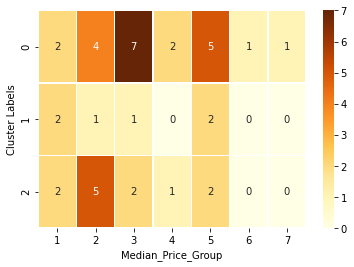

In [48]:
df2 = pd.crosstab(df['Cluster Labels'], df.Median_Price_Group)

sns.heatmap(df2, annot = True, linewidths=.5, cmap="YlOrBr")

In [49]:
df_groupedby_cluster = df.groupby('Cluster Labels').mean()

df_groupedby_cluster.sort_values(by=['Median_Price']).head(15)

,Grocery Store,Gym,Japanese Restaurant,Park,Train/Tram Station,km,lat,lon,Median_Price,Median_Price_Group
Cluster Labels,,,,,,,,,,
1,3.000000,1.166667,2.500000,1.500000,1.500000,17.383333,-37.843605,145.154642,615666.666667,2.833333
2,3.916667,1.166667,2.333333,1.833333,2.333333,11.500000,-37.869115,145.046889,627250.000000,2.666667
0,3.409091,2.000000,1.818182,2.227273,2.727273,5.477273,-37.809376,144.985630,859186.363636,3.500000


### Observations ⬆️ 

Based on the table above, we can observe that as km from CBD is greater, the median price decreases. 

As such, Sam could start his search of his dream home from whichever clusters he feel like. I would recommend him to start with cluster 1 first, as these neighborhoods are not far from the CBD and he has the budget to buy higher end properties (greater than median price) within the neighborhood.

The table & map below are filtered to each cluster for his viewing pleasure and reference.

### Cluster 1 Reference

In [50]:
df_cluster_1 = df.loc[df['Cluster Labels'] == 1]
df_venues_sam_final_cluster_1 = df_venues_sam_final.copy(deep=True)
df_venues_sam_final_cluster_1 = pd.merge(df_cluster_1, df_venues_sam_final_cluster_1, 
                                         left_on=['Neighborhood'], right_on=['Neighborhood'])

# create map
melbPrice_map = folium.Map(location=[lat_CBD, lon_CBD], tiles='CartoDB positron' , zoom_start=11)

# add markers to map
for lat, lng, neigh, km, price,  color in zip(df_cluster_1['lat'], df_cluster_1['lon'], df_cluster_1['Neighborhood'], df_cluster_1['km'],df_cluster_1['Median_Price'], df_cluster_1['Median_Price_Group_Colours']):
    label = '{}, {}km, {}'.format(neigh, km, price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.75,
        parse_html=False).add_to(melbPrice_map)

for lat, lng, cat, venue in zip(df_venues_sam_final_cluster_1['Venue Latitude'], df_venues_sam_final_cluster_1['Venue Longitude'], df_venues_sam_final_cluster_1['Venue Category New'], df_venues_sam_final_cluster_1['Venue']):
    label = '{} ({})'.format(venue, cat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='grey',
        fill=True,
        fill_color='grey',
        fill_opacity=0.15,
        parse_html=False).add_to(melbPrice_map)
    
#add an icon at  Melbourne CBD
text = 'Melbourne CBD'

iframe = folium.IFrame(text, width=200, height=25)
popup = folium.Popup(iframe, max_width=3000)

melbPrice_map.add_child(folium.Marker(location=[lat_CBD, lon_CBD], popup=popup,
                     icon=folium.Icon(color='red')))

melbPrice_map

In [51]:
df_cluster_1

,Neighborhood,Grocery Store,Gym,Japanese Restaurant,Park,Train/Tram Station,PostalCode,km,lat,lon,Median_Price,Median_Price_Group,Median_Price_Group_Colours,Cluster Labels
3,BLACKBURN NORTH,3.0,1.0,2.0,2.0,1.0,3130,15.9,-37.810403,145.152100,1002500.0,5,coral,1
9,BURWOOD EAST,4.0,1.0,2.0,1.0,2.0,3151,16.5,-37.858352,145.138553,322500.0,1,darkgreen,1
17,CHADSTONE CENTRE,4.0,1.0,5.0,1.0,2.0,3148,15.9,-37.886372,145.082527,111000.0,1,darkgreen,1
18,DONCASTER EAST,3.0,1.0,1.0,2.0,1.0,3109,17.8,-37.811994,145.194740,410000.0,2,mediumseagreen,1
25,GLEN WAVERLEY,2.0,1.0,4.0,1.0,2.0,3150,18.6,-37.877631,145.166222,800000.0,3,springgreen,1
33,MITCHAM,2.0,2.0,1.0,2.0,1.0,3132,19.6,-37.816878,145.193712,1048000.0,5,coral,1


### Cluster 0 Reference

In [52]:
df_cluster_0 = df.loc[df['Cluster Labels'] == 0]
df_venues_sam_final_cluster_0 = df_venues_sam_final.copy(deep=True)
df_venues_sam_final_cluster_0 = pd.merge(df_cluster_0, df_venues_sam_final_cluster_0, 
                                         left_on=['Neighborhood'], right_on=['Neighborhood'])

# create map
melbPrice_map = folium.Map(location=[lat_CBD, lon_CBD], tiles='CartoDB positron' , zoom_start=11)

# add markers to map
for lat, lng, neigh, km, price,  color in zip(df_cluster_0['lat'], df_cluster_0['lon'], df_cluster_0['Neighborhood'], df_cluster_0['km'],df_cluster_0['Median_Price'], df_cluster_0['Median_Price_Group_Colours']):
    label = '{}, {}km, {}'.format(neigh, km, price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.75,
        parse_html=False).add_to(melbPrice_map)

for lat, lng, cat, venue in zip(df_venues_sam_final_cluster_0['Venue Latitude'], df_venues_sam_final_cluster_0['Venue Longitude'], df_venues_sam_final_cluster_0['Venue Category New'], df_venues_sam_final_cluster_0['Venue']):
    label = '{} ({})'.format(venue, cat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='grey',
        fill=True,
        fill_color='grey',
        fill_opacity=0.15,
        parse_html=False).add_to(melbPrice_map)
    
#add an icon at  Melbourne CBD
text = 'Melbourne CBD'

iframe = folium.IFrame(text, width=200, height=25)
popup = folium.Popup(iframe, max_width=3000)

melbPrice_map.add_child(folium.Marker(location=[lat_CBD, lon_CBD], popup=popup,
                     icon=folium.Icon(color='red')))

melbPrice_map

In [53]:
df_cluster_0

,Neighborhood,Grocery Store,Gym,Japanese Restaurant,Park,Train/Tram Station,PostalCode,km,lat,lon,Median_Price,Median_Price_Group,Median_Price_Group_Colours,Cluster Labels
0,ALPHINGTON,2.0,1.0,2.0,3.0,3.0,3078,6.4,-37.780767,145.031160,1738800.0,6,red,0
1,ARMADALE,4.0,1.0,4.0,2.0,6.0,3143,6.3,-37.859340,145.018505,820000.0,4,gold,0
2,ASCOT VALE,7.0,5.0,2.0,1.0,2.0,3032,5.9,-37.775830,144.923377,805000.0,4,gold,0
10,CAMBERWELL,2.0,1.0,1.0,2.0,3.0,3124,7.8,-37.824818,145.057957,650000.0,3,springgreen,0
11,CARLTON,2.0,3.0,2.0,2.0,1.0,3053,1.8,-37.784337,144.969747,497400.0,2,mediumseagreen,0
12,CARLTON NORTH,2.0,3.0,2.0,2.0,1.0,3054,3.2,-37.784337,144.969747,750000.0,3,springgreen,0
15,CAULFIELD NORTH,2.0,1.0,1.0,2.0,1.0,3161,8.1,-37.901678,145.023570,1160000.0,5,coral,0
19,ESSENDON,5.0,3.0,1.0,3.0,3.0,3040,8.0,-37.754973,144.917407,638800.0,3,springgreen,0
20,FAIRFIELD,4.0,1.0,2.0,2.0,3.0,3078,5.8,-37.776946,145.018479,1120000.0,5,coral,0
21,FITZROY NORTH,3.0,1.0,1.0,1.0,1.0,3068,3.5,-37.783400,144.984688,1100000.0,5,coral,0


### Cluster 2 Reference

In [54]:
df_cluster_2 = df.loc[df['Cluster Labels'] == 2]
df_venues_sam_final_cluster_2 = df_venues_sam_final.copy(deep=True)
df_venues_sam_final_cluster_2 = pd.merge(df_cluster_2, df_venues_sam_final_cluster_2, 
                                         left_on=['Neighborhood'], right_on=['Neighborhood'])

# create map
melbPrice_map = folium.Map(location=[lat_CBD, lon_CBD], tiles='CartoDB positron' , zoom_start=11)

# add markers to map
for lat, lng, neigh, km, price,  color in zip(df_cluster_2['lat'], df_cluster_2['lon'], df_cluster_2['Neighborhood'], df_cluster_2['km'],df_cluster_2['Median_Price'], df_cluster_2['Median_Price_Group_Colours']):
    label = '{}, {}km, {}'.format(neigh, km, price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.75,
        parse_html=False).add_to(melbPrice_map)

for lat, lng, cat, venue in zip(df_venues_sam_final_cluster_2['Venue Latitude'], df_venues_sam_final_cluster_2['Venue Longitude'], df_venues_sam_final_cluster_2['Venue Category New'], df_venues_sam_final_cluster_2['Venue']):
    label = '{} ({})'.format(venue, cat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='grey',
        fill=True,
        fill_color='grey',
        fill_opacity=0.15,
        parse_html=False).add_to(melbPrice_map)
    
#add an icon at  Melbourne CBD
text = 'Melbourne CBD'

iframe = folium.IFrame(text, width=200, height=25)
popup = folium.Popup(iframe, max_width=3000)

melbPrice_map.add_child(folium.Marker(location=[lat_CBD, lon_CBD], popup=popup,
                     icon=folium.Icon(color='red')))

melbPrice_map

In [55]:
df_cluster_2

,Neighborhood,Grocery Store,Gym,Japanese Restaurant,Park,Train/Tram Station,PostalCode,km,lat,lon,Median_Price,Median_Price_Group,Median_Price_Group_Colours,Cluster Labels
4,BOX HILL,3.0,2.0,1.0,1.0,3.0,3128,13.1,-37.817455,145.119314,550000.0,2,mediumseagreen,2
5,BOX HILL CENTRAL,3.0,1.0,1.0,1.0,2.0,3128,13.1,-37.819107,145.121273,235000.0,1,darkgreen,2
6,BRIGHTON EAST,6.0,1.0,2.0,2.0,2.0,3187,10.7,-37.904879,145.002603,530000.0,2,mediumseagreen,2
7,BRIGHTON NORTH,5.0,1.0,2.0,2.0,2.0,3186,10.4,-37.903864,145.001899,402500.0,2,mediumseagreen,2
8,BURWOOD,3.0,1.0,2.0,2.0,2.0,3125,11.7,-37.852805,145.151909,672500.0,3,springgreen,2
13,CARNEGIE,4.0,1.0,3.0,4.0,4.0,3163,11.4,-37.889336,145.058121,615000.0,3,springgreen,2
14,CAULFIELD,2.0,1.0,1.0,1.0,1.0,3162,8.9,-37.880479,145.026806,500000.0,2,mediumseagreen,2
16,CHADSTONE,4.0,1.0,5.0,1.0,2.0,3148,13.6,-37.886372,145.082527,532000.0,2,mediumseagreen,2
24,GLEN HUNTLY,5.0,1.0,2.0,1.0,1.0,3163,10.4,-37.889239,145.040629,1331000.0,5,coral,2
30,MALVERN NORTH,5.0,2.0,5.0,1.0,5.0,3144,13.0,-37.856852,145.036518,239000.0,1,darkgreen,2


# 5. Conclusion <a name="conclusion"></a>
#### Go back to [Table of Contents](#toc)

The purpose of this project is to prepare a shortlist of neighborhoods for Sam to consider based on his needs. Data from multiple sources were transformed & combined to achieve this purpose. Using K-Means clustering technique, I was able to provide a more refined list of neighborhoods that I feel Sam would like. From over 300 neighborhoods near Melbourne to less than 15 neighborhood recommendations, Sam will be able to find his dream home very soon!

Some potential improvement data points that could increase the value of this project:
1. Friends and family location by neighborhood data
2. Available homes for sale & price data
3. Crime statistics by neighborhood data
4. Neighborhood demographics data

# 6. References <a name="references"></a>
#### Go back to [Table of Contents](#toc)

[1] Corra. URL: https://www.corra.com.au/australian-postcode-location-data/  (visited on 2021/05/23)

[2] Myboot. URL: http://myboot.com.au/VIC/25/suburblist.aspx  (visited on 2021/05/23)

[3] Foursquare. URL: https://foursquare.com/  (visited on 2021/05/23)

[4] Victoria State Government. URL: https://discover.data.vic.gov.au/dataset/victorian-property-sales-report-median-house-by-suburb (visited on 2021/05/23)


### Go back to [2.1 Description of Data](#data)
### Go back to [2.3 Data Preparation](#dataprep)